# DBSCAN with Scikit-learn

## Set up and generate data

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

plt.style.use('ggplot')
%matplotlib inline

In [2]:
X, label = make_moons(n_samples=200, noise=0.1, random_state=19)
print X[:5,]

[[ 0.28171457  0.91044406]
 [ 0.8389241  -0.53005338]
 [ 0.40915474  0.80944352]
 [-0.98415213  0.13142155]
 [ 1.15919021  0.4910425 ]]


## Train the model

In [3]:
# model = DBSCAN?
model = DBSCAN(eps=0.25, min_samples=12).fit(X)
print model

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
    min_samples=12, p=None, random_state=None)


## Access the cluster labels and core points

In [4]:
model.labels_

array([ 0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,
        1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,
        0,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  1, -1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,
        0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  0,  0,
        0,  1,  0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1,  1,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0])

In [5]:
model.core_sample_indices_

array([  0,   1,   2,   7,   9,  10,  12,  13,  14,  18,  20,  21,  22,
        23,  24,  26,  28,  29,  31,  32,  33,  34,  35,  37,  38,  39,
        40,  41,  42,  44,  45,  46,  47,  49,  50,  51,  55,  56,  57,
        58,  59,  60,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        73,  75,  76,  77,  78,  79,  81,  83,  84,  86,  87,  88,  89,
        91,  92,  93,  94,  96,  98, 101, 102, 104, 105, 106, 107, 108,
       109, 110, 112, 113, 114, 115, 117, 118, 119, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 134, 136, 137, 138, 139, 140,
       142, 143, 144, 145, 147, 148, 149, 150, 154, 155, 157, 158, 159,
       160, 162, 163, 164, 165, 166, 170, 172, 173, 175, 177, 180, 182,
       183, 184, 187, 188, 189, 190, 191, 195, 197])

## Plot the clusters in feature space

/home/brian/miniconda/envs/complete/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/brian/miniconda/envs/complete/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


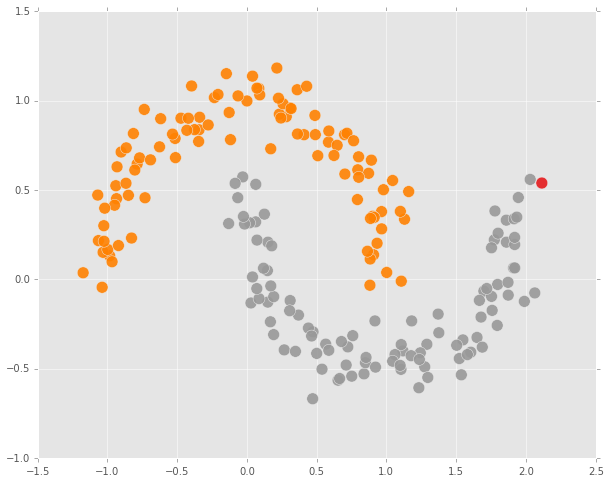

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
sctr = ax.scatter(X[:, 0], X[:, 1], c=model.labels_, s=140, alpha=0.9,
                 cmap=plt.cm.Set1)
fig.show()

-----

# DBSCAN with GraphLab Create

In [7]:
import graphlab as gl

sf = gl.SFrame(X)
sf = sf.unpack('X1')
model2 = gl.dbscan.create(sf, radius=0.25, min_core_neighbors=10)

[INFO] This commercial license of GraphLab Create is assigned to engr@dato.com.

[INFO] Start server at: ipc:///tmp/graphlab_server-2799 - Server binary: /home/brian/miniconda/envs/complete/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1447696932.log
[INFO] GraphLab Server Version: 1.6.1
[INFO] Identifying noise points and core points.
[INFO] Constructing the core point similarity graph.
[INFO] Processing boundary points.


PROGRESS: Starting brute force nearest neighbors model training.
PROGRESS: Starting blockwise similarity graph construction.
PROGRESS: max rows per data block: 11583
PROGRESS: number of reference data blocks: 4
PROGRESS: +---------+-------------+--------------+
PROGRESS: | # Pairs | % Complete. | Elapsed Time |
PROGRESS: +---------+-------------+--------------+
PROGRESS: | 5000    | 20          | 477us        |
PROGRESS: | 25000   | 100         | 1.376ms      |
PROGRESS: +---------+-------------+--------------+
PROGRESS: +-----------------------------+
PROGRESS: | Number of components merged |
PROGRESS: +-----------------------------+
PROGRESS: | 162                         |
PROGRESS: | 0                           |
PROGRESS: +-----------------------------+


In [8]:
model2.summary()

Class                                   : DBSCANModel

Schema
------
Number of examples                      : 200
Number of feature columns               : 2
Max distance to a neighbor (radius)     : 0.25
Min number of neighbors for core points : 10
Number of distance components           : 1

Training summary
----------------
Total training time (seconds)           : 2.0462
Number of clusters                      : 2

Accessible fields
-----------------
   cluster_id                           : Cluster label for each row in the input dataset.


## Access cluster labels and instance types

In [9]:
model2['cluster_id']

row_id,cluster_id,type
136,0,core
110,1,core
96,1,core
175,1,core
155,0,core
92,1,core
115,0,core
73,0,core
5,1,core
7,1,core


## Plot by instance type

In [10]:
sf_out = sf.add_row_number('row_id')
sf_out = sf_out.join(model2['cluster_id'], on='row_id', how='left')

In [11]:
type_map = {k: v for v, k in enumerate(sf_out['type'].unique())}
sf_out['type_code'] = sf_out['type'].apply(lambda x: type_map[x])

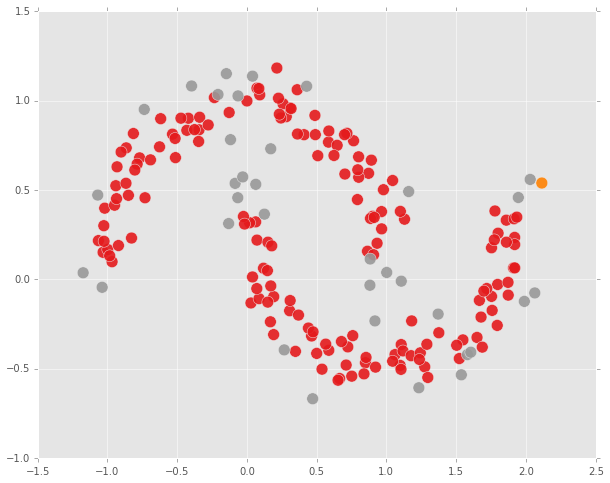

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(sf_out['X1.0'], sf_out['X1.1'], c=sf_out['type_code'],
           s=140, alpha=0.9, cmap=plt.cm.Set1)
fig.show()

# Document Deduplication with DBSCAN

In [13]:
wiki = gl.SFrame('wikipedia_sample')
wiki = wiki.add_row_number('row_id')
wiki.print_rows(5, max_column_width=70, max_row_width=90)

+--------+-----------------------------------------------------------------------+
| row_id |                                   X1                                  |
+--------+-----------------------------------------------------------------------+
|   0    | alcaeusofmytilene pittacus this coin is said to have belonged the ... |
|   1    | aquaculture the output as reported from aquaculture would supply o... |
|   2    | adhominem an ad hominem latin to the man also known as argumentum ... |
|   3    | augereffect upon ejection the kinetic energy of the auger electron... |
|   4    | astronomicalyearnumbering the prefix ad and the suffixes ce bc or ... |
+--------+-----------------------------------------------------------------------+
[14626 rows x 2 columns]



## Feature engineering

### Convert to bag-of-words

In [14]:
wiki['words'] = gl.text_analytics.count_words(wiki['X1'])
wiki[['words']].print_rows(5, max_column_width=80)

+---------------------------------------------------------------------------------+
|                                      words                                      |
+---------------------------------------------------------------------------------+
| {'all': 2, 'dance': 1, 'rhetorician': 1, 'tattered': 1, 'four': 1, 'suppleme... |
| {'all': 3, 'evidence': 1, 'remarkable': 1, 'global': 6, 'hinrichsen': 1, 'fo... |
| {'affair': 5, 'all': 1, 'consider': 1, 'pointing': 1, 'similarity': 1, 'bein... |
| {'caused': 1, 'charles': 1, 'competitive': 1, 'discovered': 2, 'ionize': 1, ... |
| {'planetary': 1, 'being': 1, 'storage': 1, 'astronomical': 5, 'numbering': 1... |
+---------------------------------------------------------------------------------+
[14626 rows x 1 columns]



### Remove stop-words

In [15]:
wiki['words'] = wiki['words'].dict_trim_by_keys(gl.text_analytics.stopwords(),
                                                exclude=True)

### Create the model

In [16]:
#dbscan = gl.dbscan.create(wiki, features=['words'],
#                          distance='jaccard', radius=0.6,
#                          min_core_neighbors=1, verbose=False)

#dbscan.save('wiki_dbscan.gl')
dbscan = gl.load_model('wiki_dbscan.gl')
dbscan.summary()

Class                                   : DBSCANModel

Schema
------
Number of examples                      : 14626
Number of feature columns               : 1
Max distance to a neighbor (radius)     : 0.6
Min number of neighbors for core points : 1
Number of distance components           : 1

Training summary
----------------
Total training time (seconds)           : 87.699
Number of clusters                      : 112

Accessible fields
-----------------
   cluster_id                           : Cluster label for each row in the input dataset.


In [17]:
dbscan['cluster_id'].show()

Canvas is accessible via web browser at the URL: http://localhost:49055/index.html
Opening Canvas in default web browser.


### Explore the clusters

In [18]:
wiki = wiki.join(dbscan['cluster_id'], on='row_id', how='left')

In [19]:
wiki[wiki['cluster_id'] == 10][['X1']].print_rows(5, max_row_width=80,
                                                  max_column_width=80)

+----------------------------------------------------------------------------------+
|                                        X1                                        |
+----------------------------------------------------------------------------------+
| hezekiahsramsdellfarm it was added to the national register of historic plac...  |
| pomeroycottage it was listed on the national register of historic places in 1992 |
| douglassplace douglass place was listed on the national register of historic...  |
| glencoeglencoemaryland it was listed on the national register of historic pl...  |
| hooperhouseswanseamassachusetts swansea massachusetts the house was built in...  |
+----------------------------------------------------------------------------------+
[39 rows x 1 columns]

